# ANALYSE DE WINE-QUALITY

Il est question ici d'analyser a partir d'un dataset la qualite d'un vin et de determiner la qualite de celui-ci a partir des notes qu'il a obtenu (probablement donne par des experts sommeliers).
Nous ferons principalement dans ce notebook :
- Du Data Cleaning 
- Du data Profiling et de la Data Exploration
- De la Data vizualisation pour renforcer tout cela
- Models Building & Metrics
- Cross validation et Learning Curve (Ligne d'apprentissage fonction d'hyperparametres)
- Exporter le model final

### Import de nos bibliotheques principales.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Lecture de la dataset et sauvegarde dans unn dataframe

In [13]:
df = pd.read_csv('../datasets/winequality/winequality-red.csv')

## Data Profiling 
### (Analyse rapide de notre ensemble de donnees)

In [8]:
from ydata_profiling import ProfileReport
# make profile report as a HTML file
profile = ProfileReport(df, title='Wine Quality Report', html={'style':{'full_width':True}})
profile.to_file("wine-quality.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 43.67it/s]


## Data Exploration

In [14]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [15]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
print(df['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


### Data Cleaning (Little one: Just Dropping Clones : duplicates) 

In [17]:
# dropping duplicates 
df.drop_duplicates(inplace=True)

### Inspectons les notes et leurs effectifs

In [18]:
print(df['quality'].value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


Les notes vont probablement de 0-8 ou de 0-10 avec un critere de selection tres stricte, on ne denote que 18 sur --- qui ont obtenus la note de 8 (qui est au passage la meilleur note dans ce dataset)

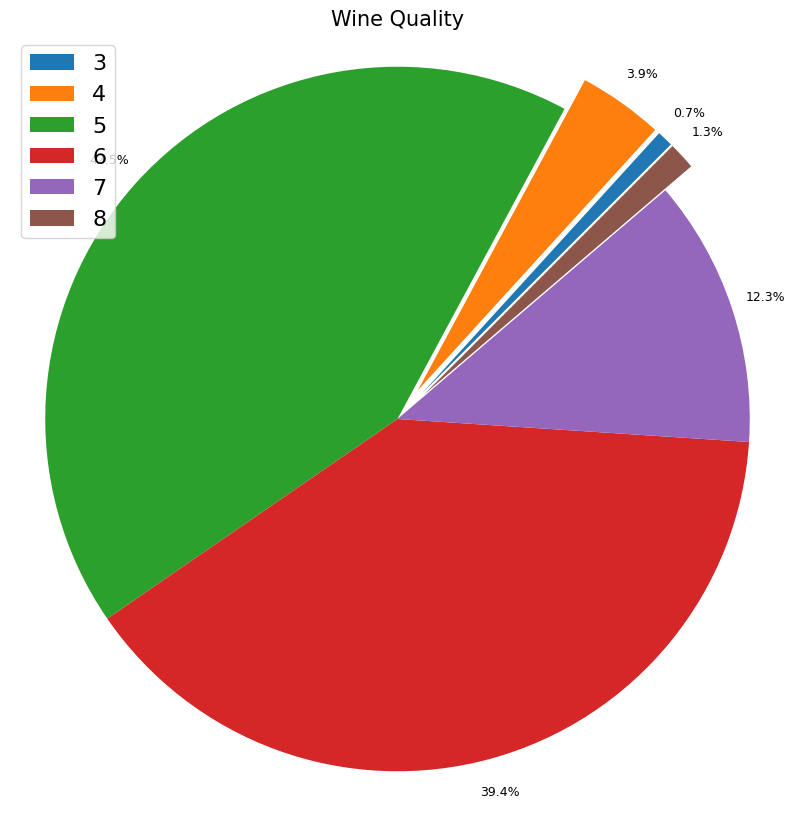

In [20]:
quality = df["quality"].value_counts().sort_index(ascending=True)
explode_list = [0.1, 0.1, 0, 0, 0, 0.1]
ax = quality.plot(kind='pie',
             figsize = (10,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             explode=explode_list,
             textprops={'fontsize': 9})
ax.patch.set_facecolor('white')
plt.title('Wine Quality', size = 15)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=quality.index, loc="upper left", fontsize=16)

- Evaluons enuite les points de correlations

<Axes: >

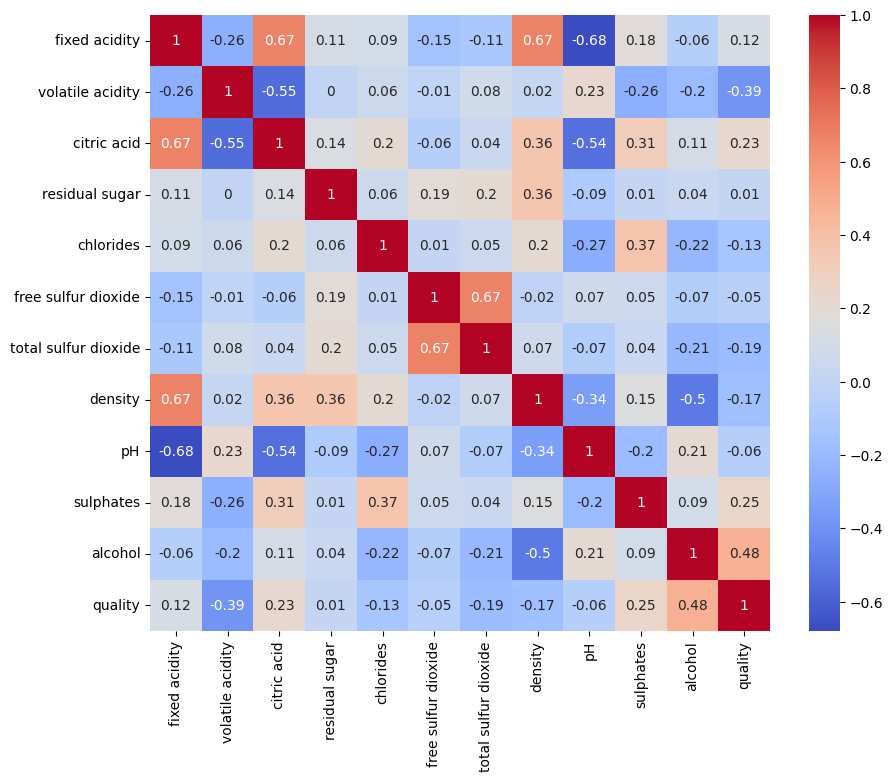

In [ ]:
# write the heatmap for all dataset with sns rounding values to 2 decimal places
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')

On retiens les plus fortes correlations

<Axes: >

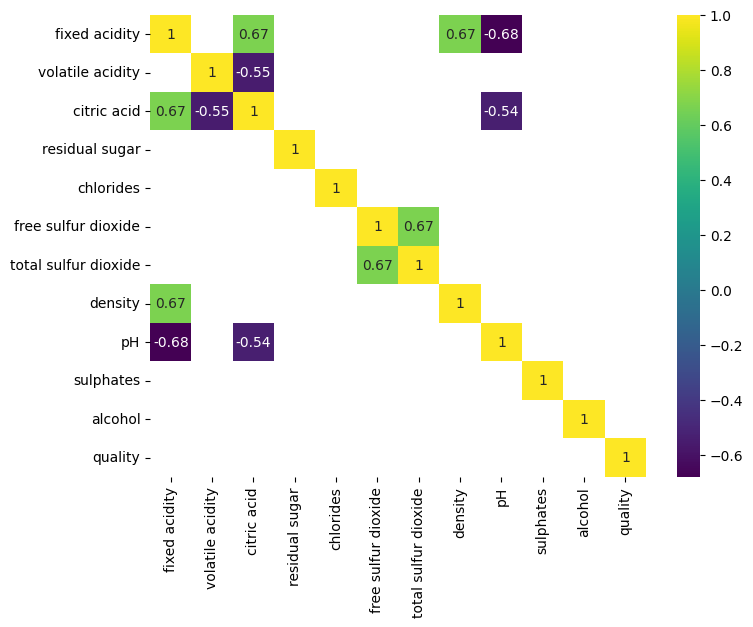

In [ ]:
# write the heatmap with only the columns with correlation greater than 0.5 and less than -0.5
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr().round(2)[(df.corr().round(2) > 0.5) | (df.corr().round(2) < -0.5)], annot=True, cmap='viridis')

On distingue ensuite les correlations Positives des Negatives

In [ ]:
corr = df.corr()
for i in range(len(corr)):
    print('Positive correlation :\n')

    a = ((corr.iloc[i]>0.5) & (corr.iloc[i]!=1))
    print(a[a==True],'\n\n')

    b = ((corr.iloc[i]<(-0.5)) & (corr.iloc[i]!=1))

    print('Negative correlation :\n')
    print(b[b==True],'\n\n')

Positive correlation :

citric acid    True
density        True
Name: fixed acidity, dtype: bool 


Negative correlation :

pH    True
Name: fixed acidity, dtype: bool 


Positive correlation :

Series([], Name: volatile acidity, dtype: bool) 


Negative correlation :

citric acid    True
Name: volatile acidity, dtype: bool 


Positive correlation :

fixed acidity    True
Name: citric acid, dtype: bool 


Negative correlation :

volatile acidity    True
pH                  True
Name: citric acid, dtype: bool 


Positive correlation :

Series([], Name: residual sugar, dtype: bool) 


Negative correlation :

Series([], Name: residual sugar, dtype: bool) 


Positive correlation :

Series([], Name: chlorides, dtype: bool) 


Negative correlation :

Series([], Name: chlorides, dtype: bool) 


Positive correlation :

total sulfur dioxide    True
Name: free sulfur dioxide, dtype: bool 


Negative correlation :

Series([], Name: free sulfur dioxide, dtype: bool) 


Positive correlation :

free

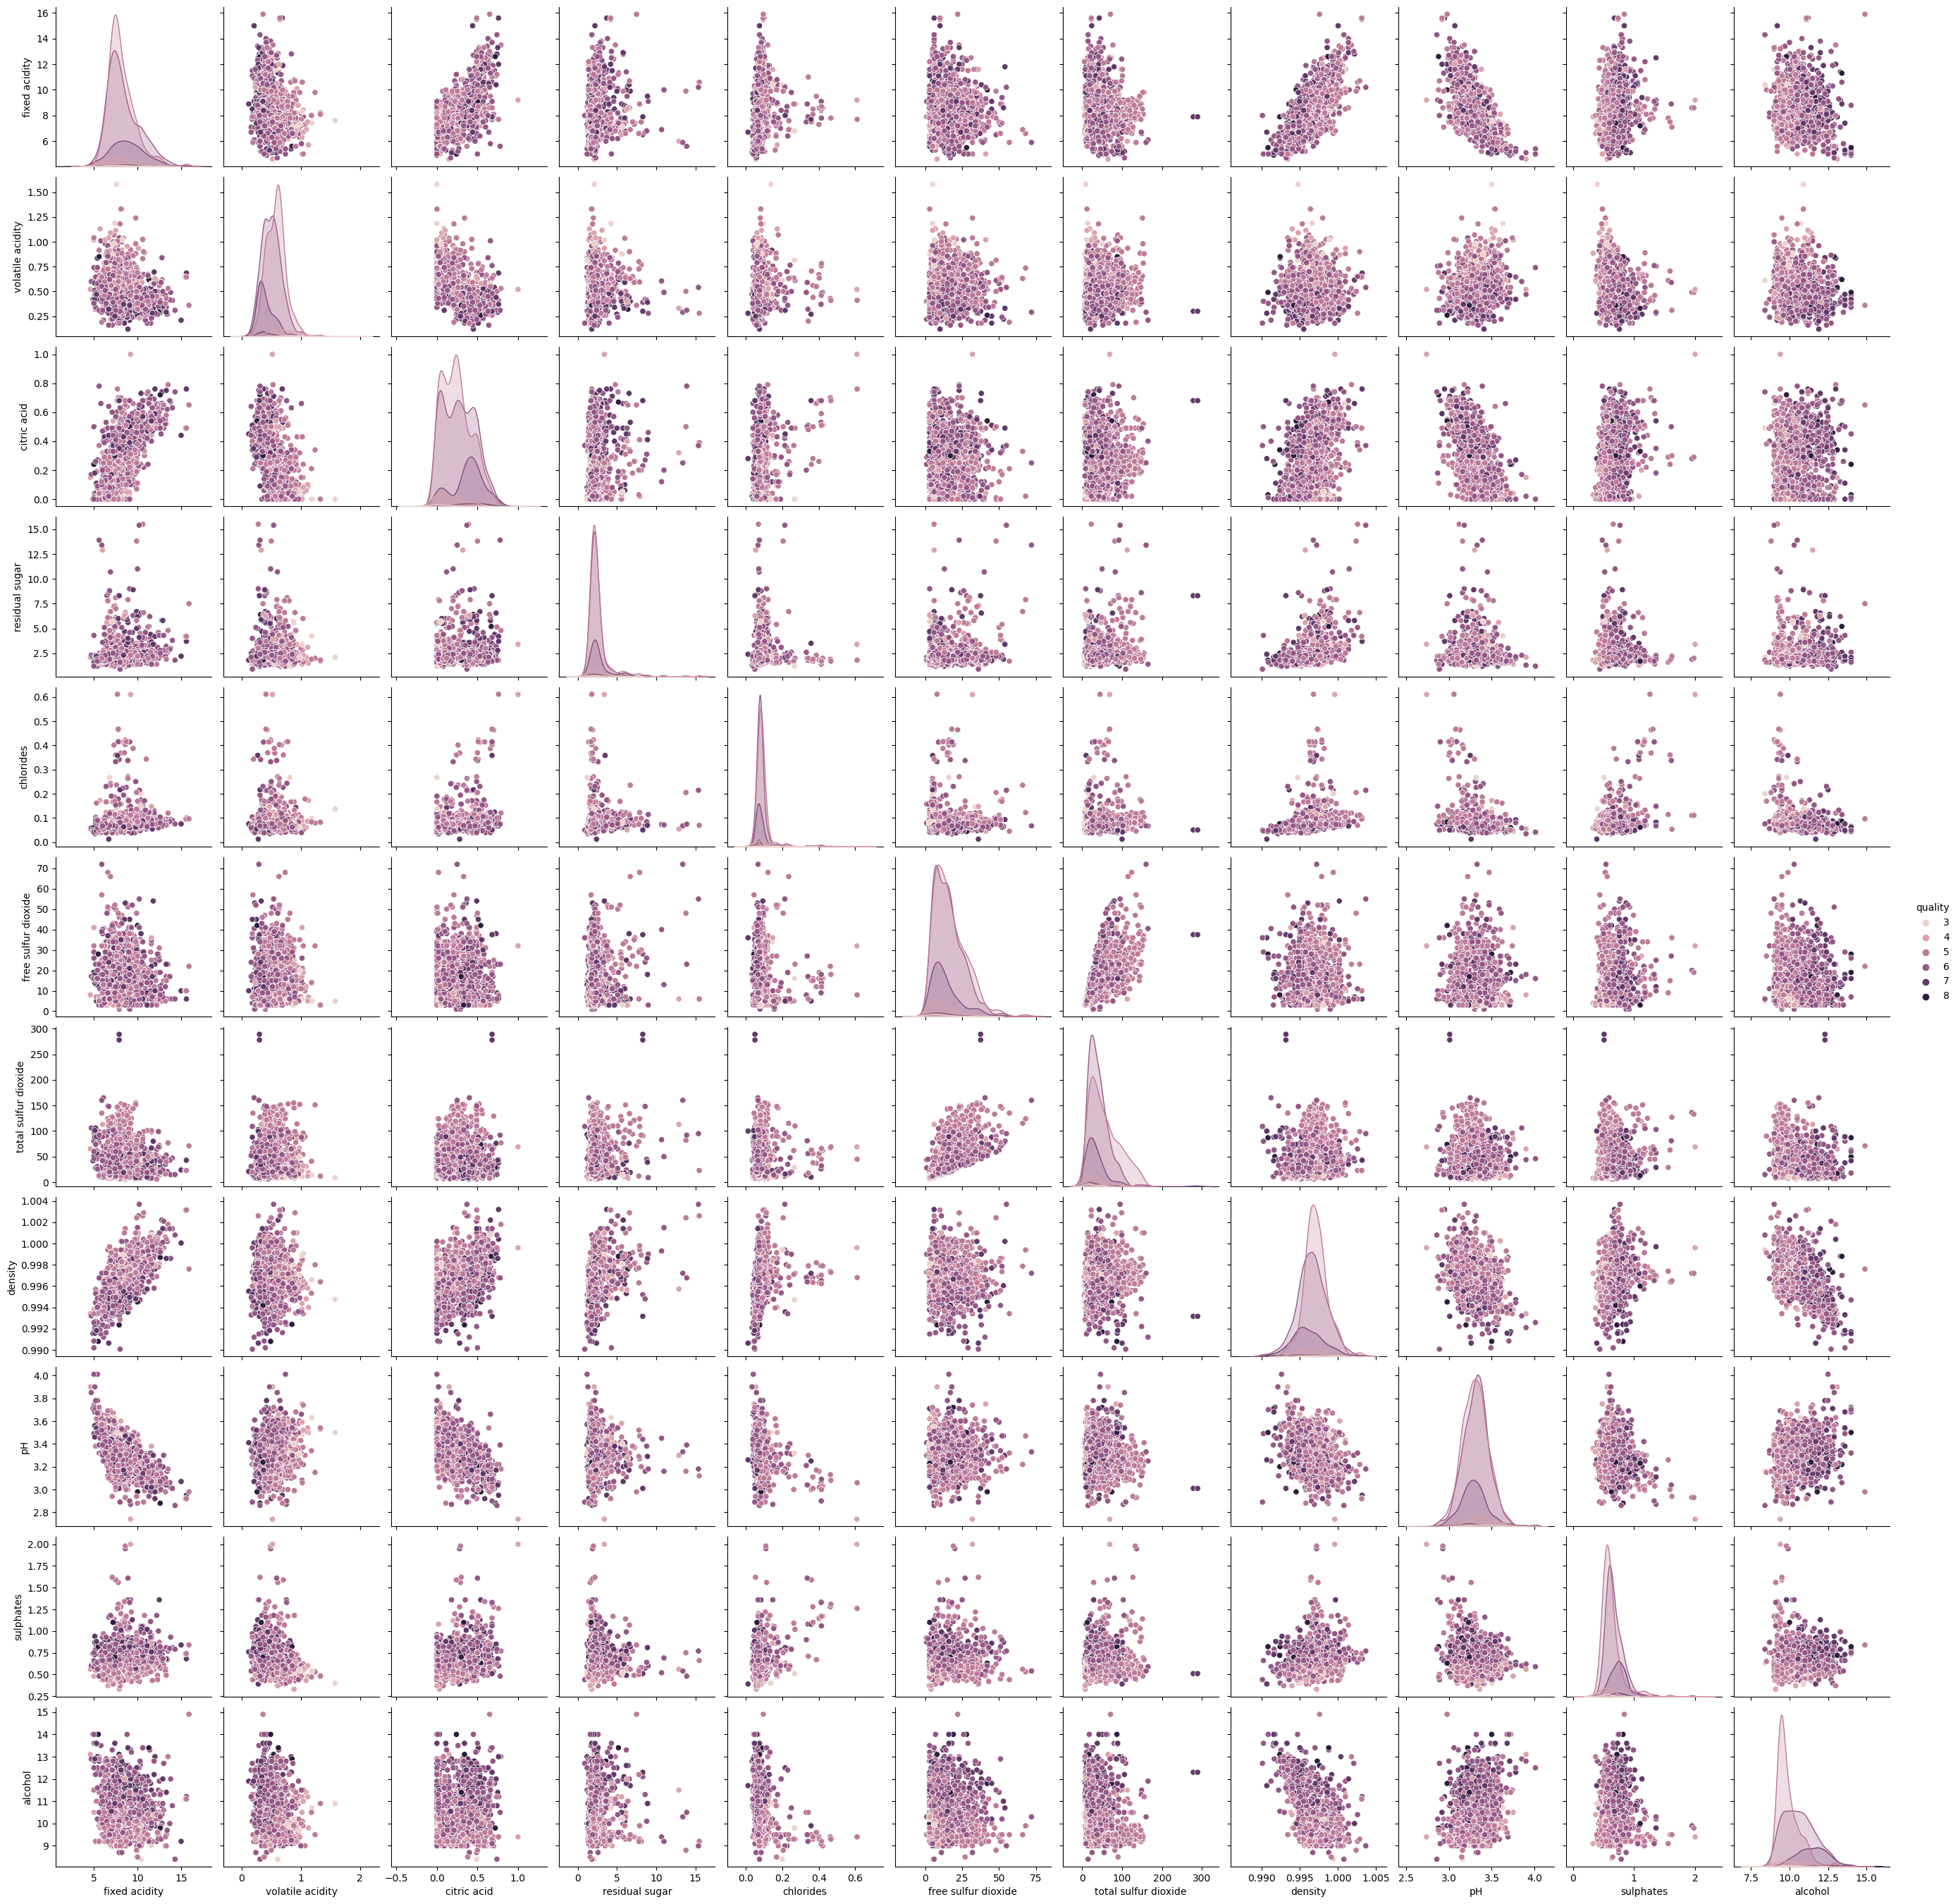

In [ ]:
# Afficher les liens entre les correlations deux a deux lies des var lies entre elles
sns.pairplot(df, hue='quality')



sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))



<Figure size 600x400 with 0 Axes>

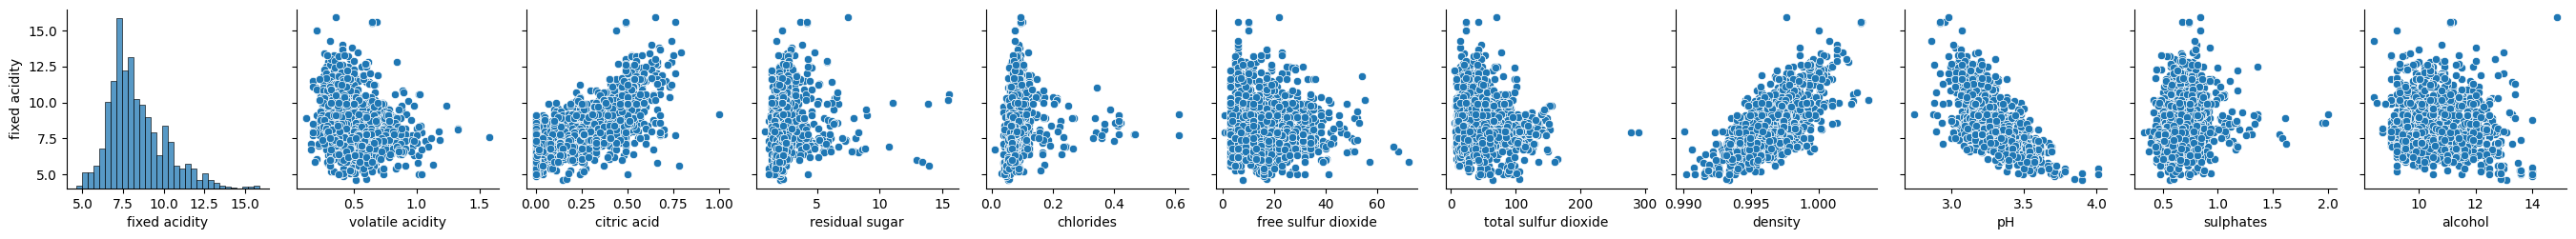

In [ ]:
plt.figure(figsize=(6, 4))
sns.pairplot(df, y_vars=['fixed acidity'], x_vars=df.columns.drop(['quality']))



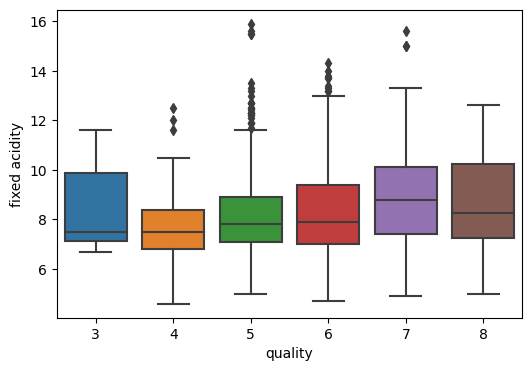

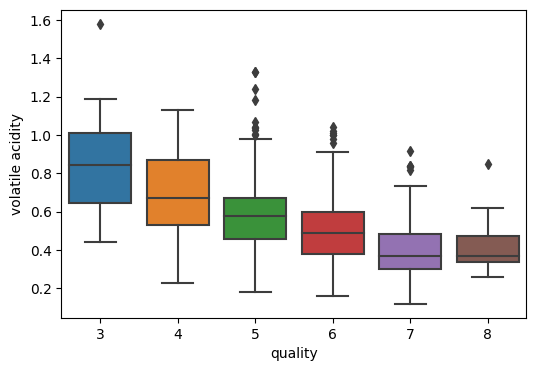

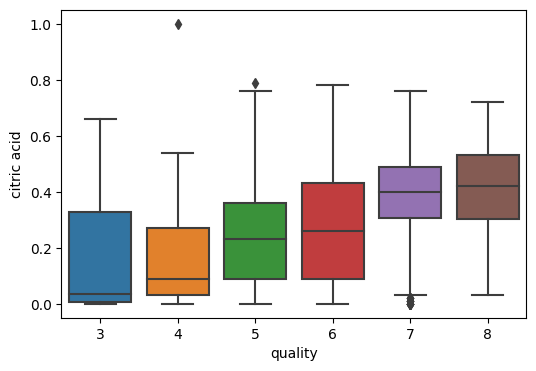

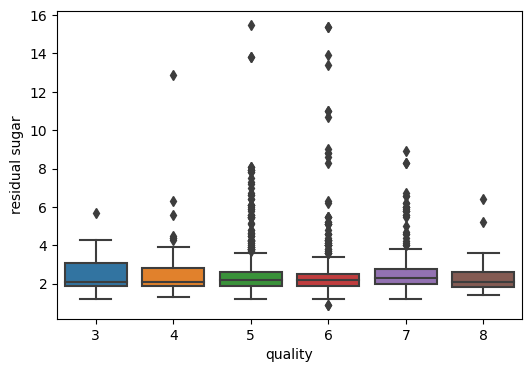

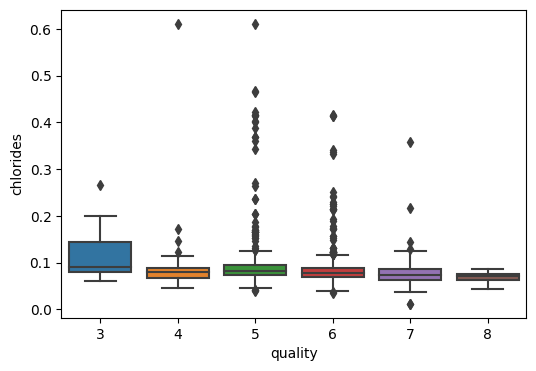

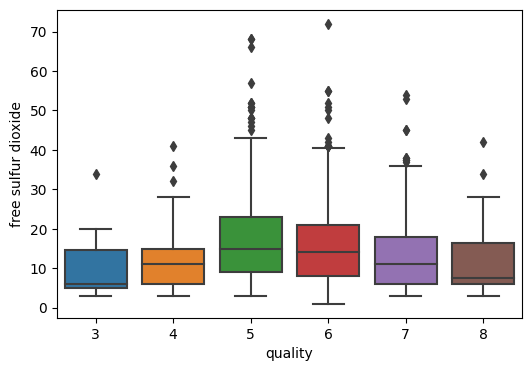

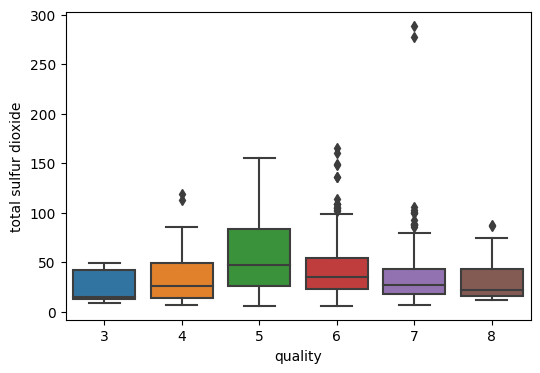

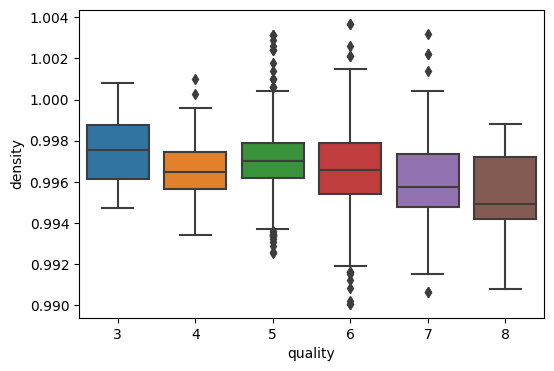

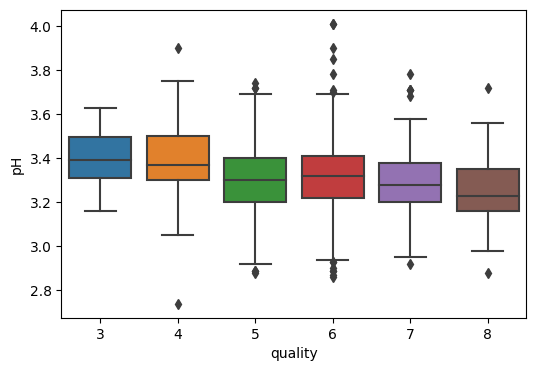

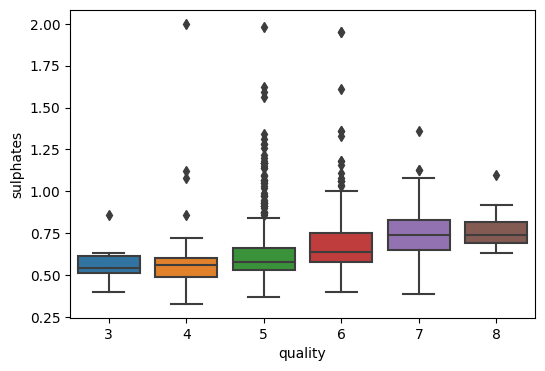

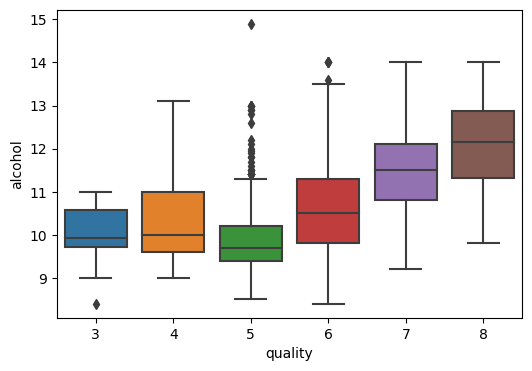

In [ ]:
# loop for all the boxplots with quality
for col in df.columns.drop(['quality']):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='quality', y=col, data=df)
    



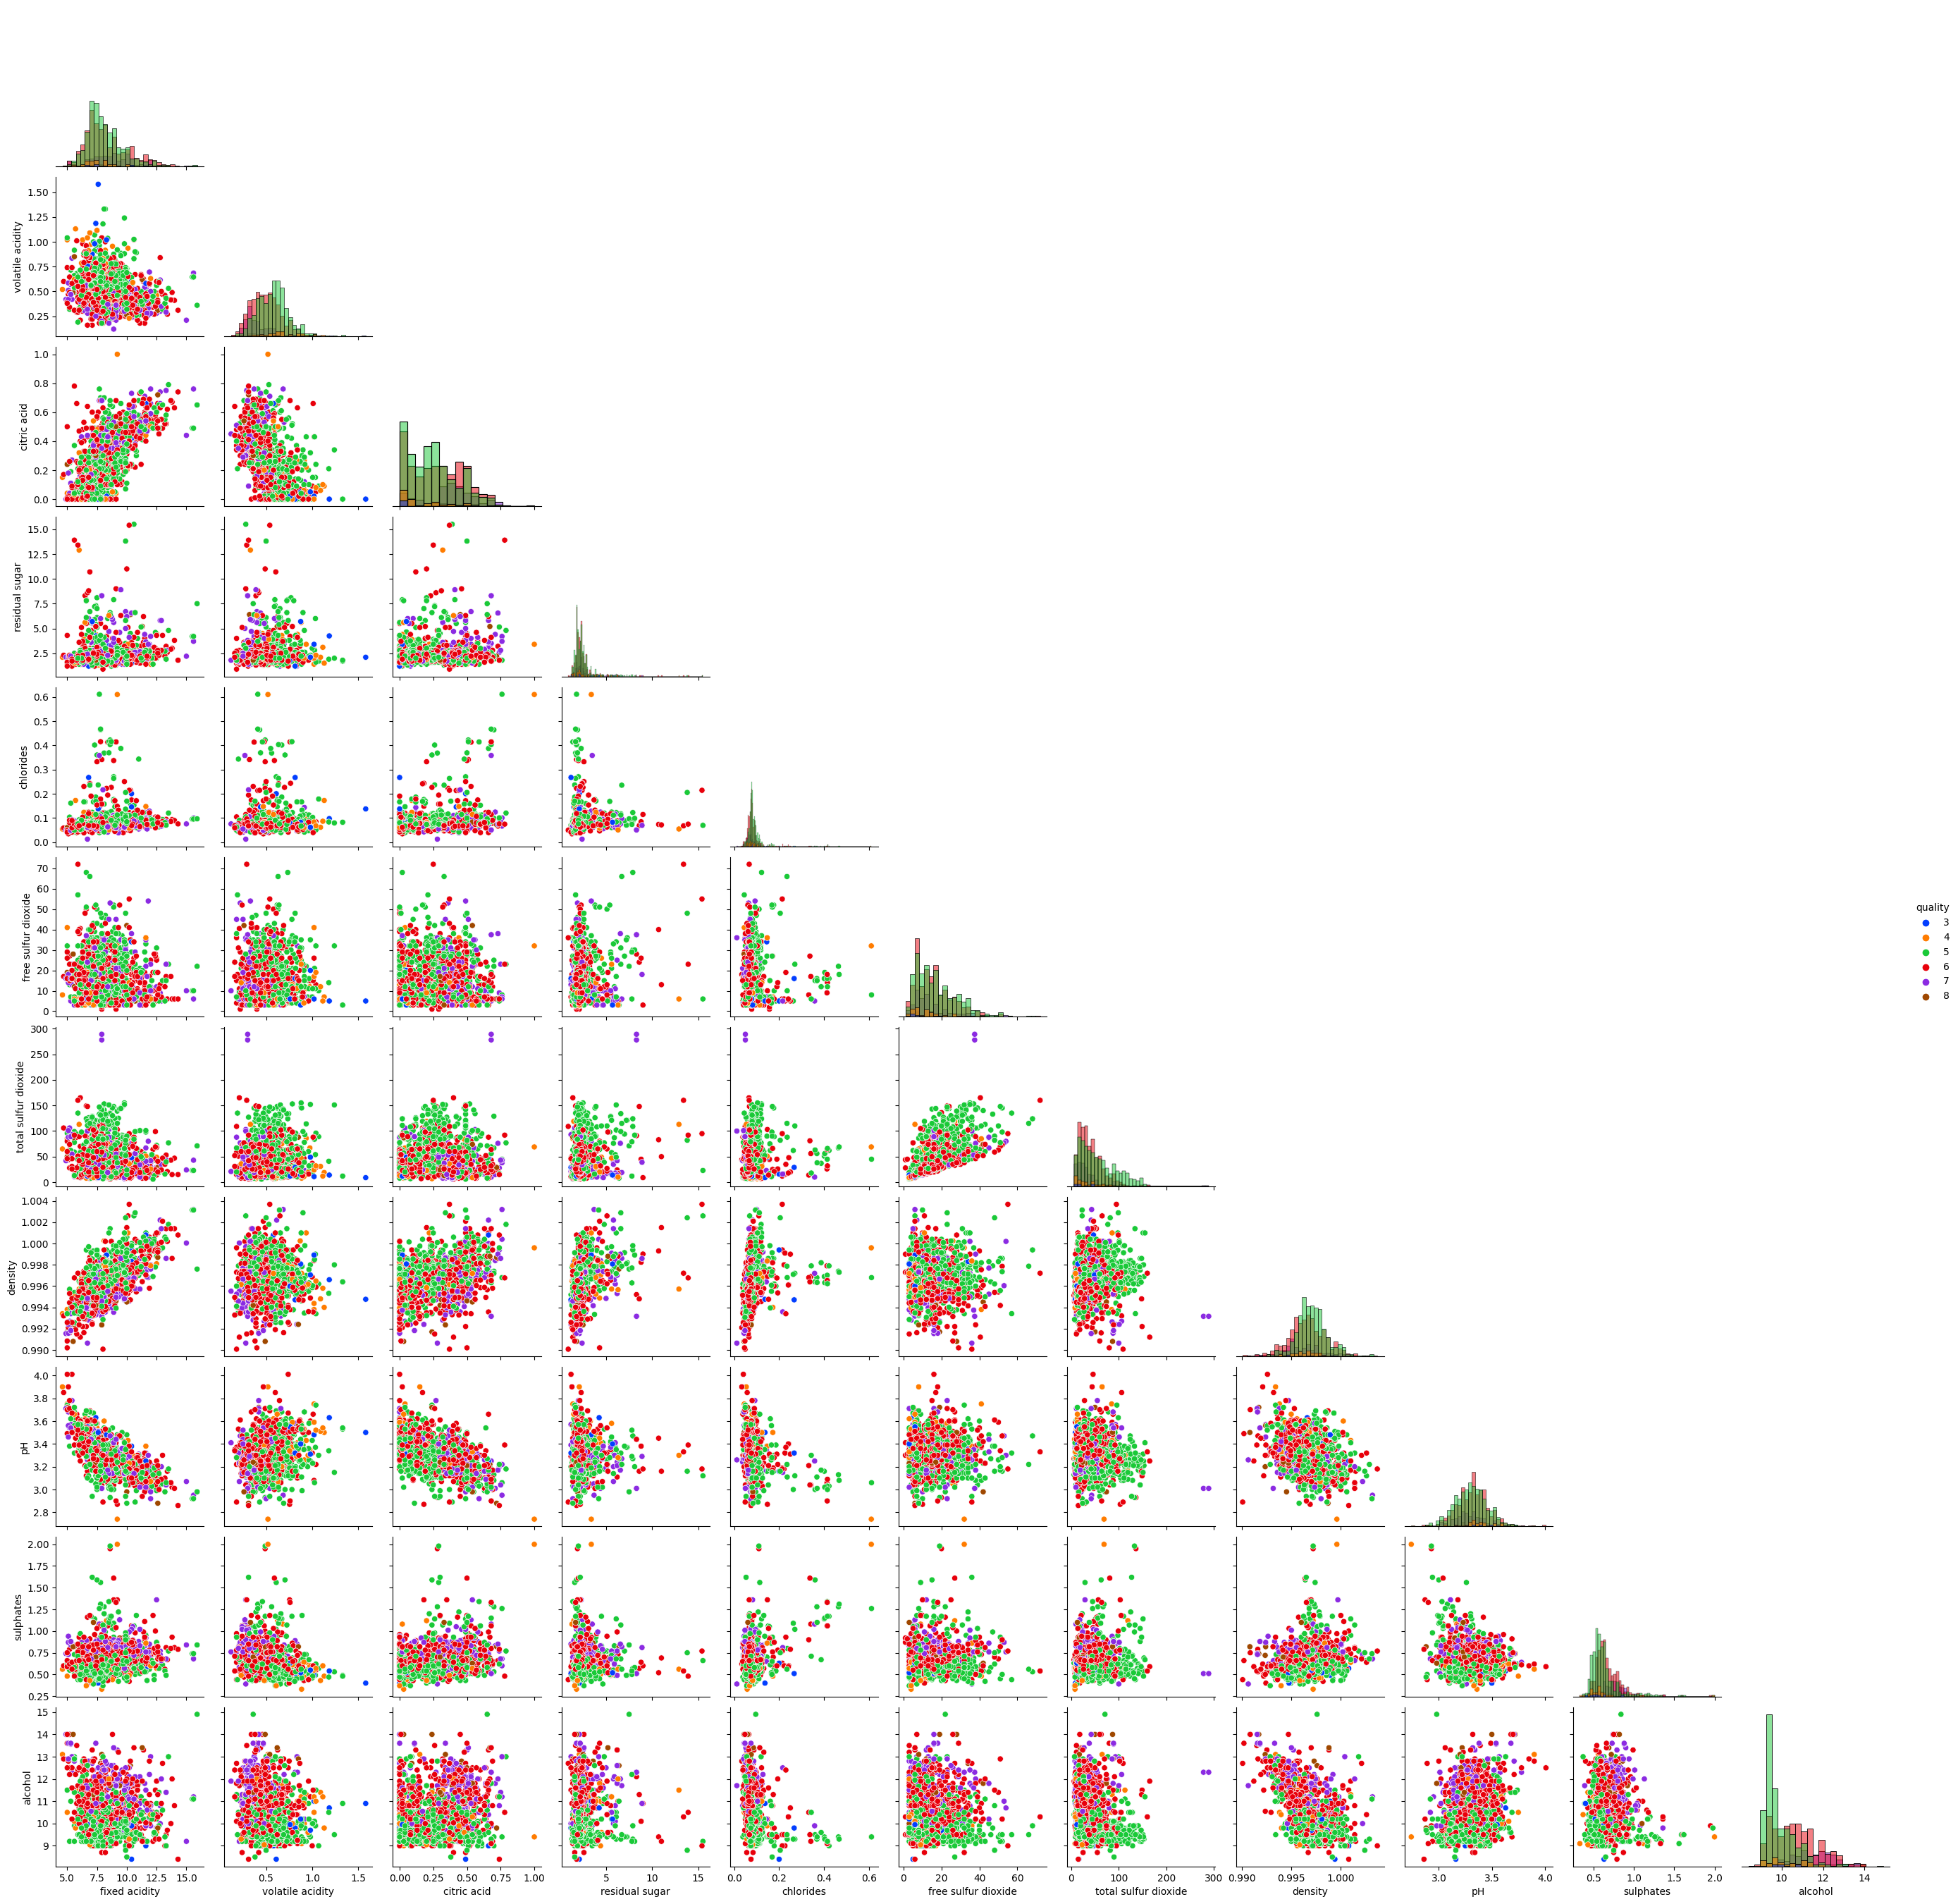

In [28]:
# Import des bibliothèques nécessaires
from sklearn.preprocessing import MinMaxScaler
from skfuzzy.cluster import cmeans

# Scinder les données en features et target
X = df.drop('quality', axis=1).values
y = df['quality'].values

# Normaliser les features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer fuzzy means clustering
cntr, u, u0, d, jm, p, fpc = cmeans(X_scaled.T, 6, 2, error=0.005, maxiter=1000, init=None)

# Assigner chaque observation au cluster le plus probable
y_pred = np.argmax(u, axis=0)

# Ajouter la prédiction au dataframe original
df_pred = df.copy()
df_pred['cluster'] = y_pred

# Créer un pairplot avec les clusters colorés selon la qualité
sns.pairplot(df_pred, hue='quality', palette='bright', corner=True, diag_kind='hist', vars=df.columns[:-2])
plt.show()


In [29]:
df.iloc[-1]

fixed acidity            6.00000
volatile acidity         0.31000
citric acid              0.47000
residual sugar           3.60000
chlorides                0.06700
free sulfur dioxide     18.00000
total sulfur dioxide    42.00000
density                  0.99549
pH                       3.39000
sulphates                0.66000
alcohol                 11.00000
quality                  6.00000
cluster                  4.00000
Name: 1598, dtype: float64

In [43]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Séparer les features et la variable cible
X = df.drop('quality', axis=1)
y = df['quality']

# Scaler les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# import libraries
from sklearn.linear_model import LogisticRegression
# Créer le modèle
clf = LogisticRegression(random_state=42, max_iter=1000)

# Entraîner le modèle
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Faire des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)

# Calculer l'accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score : ", accuracy)

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)

# Afficher le classification report
cr = classification_report(y_test, y_pred)
print("Classification Report : \n", cr)


Accuracy Score :  0.6066176470588235
Confusion Matrix : 
 [[ 0  1  3  0  0  0]
 [ 0  0  6  5  0  0]
 [ 0  1 90 29  0  0]
 [ 0  0 30 63 10  0]
 [ 0  0  3 16 12  0]
 [ 0  0  0  1  2  0]]
Classification Report : 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.68      0.75      0.71       120
           6       0.55      0.61      0.58       103
           7       0.50      0.39      0.44        31
           8       0.00      0.00      0.00         3

    accuracy                           0.61       272
   macro avg       0.29      0.29      0.29       272
weighted avg       0.57      0.61      0.58       272



c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


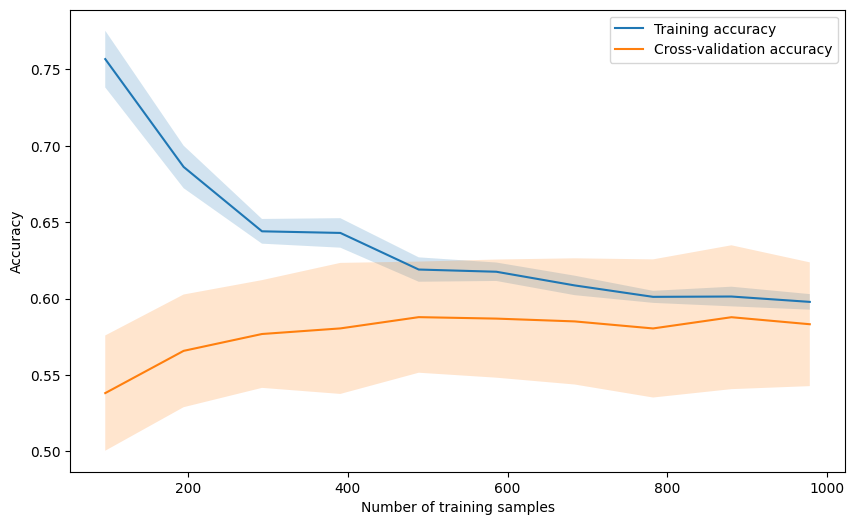

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Définir les données d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        scoring='accuracy')

# Calculer les moyennes et les écarts-types pour les scores d'apprentissage et de validation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Afficher la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Cross-validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres à tester
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100, 500, 1000]}

# Création de l'estimateur de régression logistique
lr = LogisticRegression()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Evaluation du modèle sur le jeu de test
lr_best = grid_search.best_estimator_
score = lr_best.score(X_test, y_test)
print("Score sur le jeu de test : ", score)


Meilleurs hyperparamètres :  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Score sur le jeu de test :  0.6066176470588235


c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c

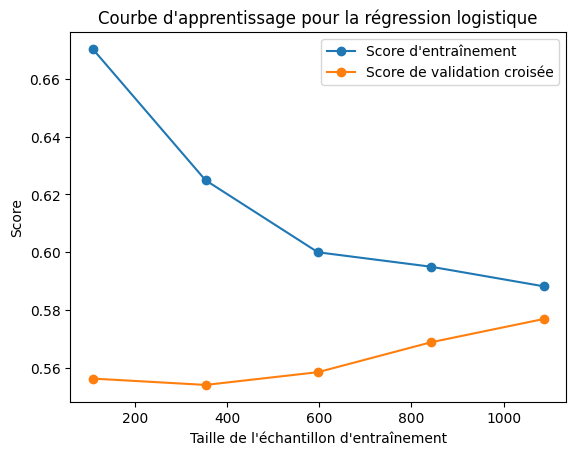

In [51]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Définition du modèle avec les meilleurs hyperparamètres trouvés précédemment
lr_best = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000)

# Calcul de la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(lr_best, X, y, cv=5)

# Affichage de la courbe d'apprentissage
plt.figure()
plt.title("Courbe d'apprentissage pour la régression logistique")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Score d'entraînement")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Score de validation croisée")
plt.legend(loc="best")  
plt.show()


In [53]:
# hyperparameter tuning with Logistic Regression and Random Forest with GridSearchCV

# import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Définition de la grille de paramètres à tester
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],}
# Création de l'estimateur de régression logistique
lr = LogisticRegression()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

Meilleurs hyperparamètres :  {'C': 1, 'penalty': 'l2'}


c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\

In [54]:
# hyperparameter tuning with Random Forest and GridSearchCV

# Définition de la grille de paramètres à tester
param_grid = {'n_estimators': [10, 50, 100, 200, 500],
                'max_depth': [2, 3, 5, 10, 20],
                'min_samples_split': [2, 5, 10, 20, 50],
                'min_samples_leaf': [1, 2, 5, 10, 20]}
# Création de l'estimateur de forêt aléatoire
rf = RandomForestClassifier()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20, 50],
                         'n_estimators': [10, 50, 100, 200, 500]})

In [55]:
# affichons les meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

Meilleurs hyperparamètres :  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [56]:
# construisons les modèles avec les meilleurs hyperparamètres
lr = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1000)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=5)

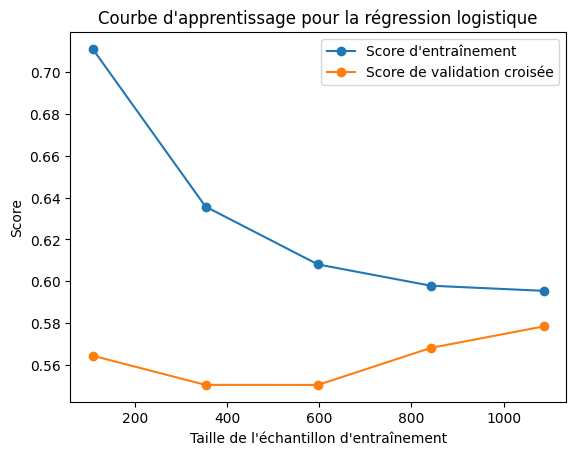

In [57]:
# evaluons les courbes de performance des deux modèles
from sklearn.model_selection import learning_curve

# Calcul de la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, cv=5)

# Affichage de la courbe d'apprentissage
plt.figure()
plt.title("Courbe d'apprentissage pour la régression logistique")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Score d'entraînement")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Score de validation croisée")
plt.legend(loc="best")
plt.show()


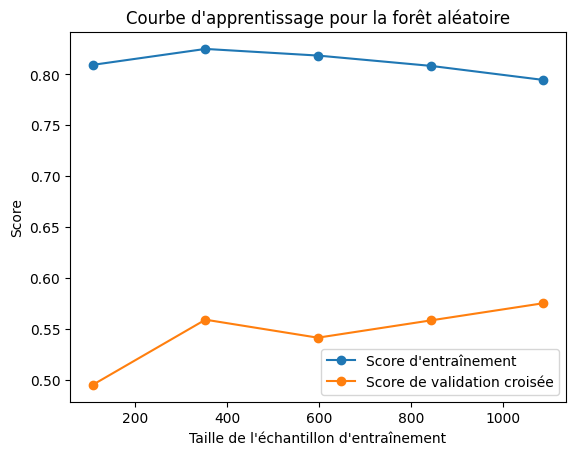

In [58]:
# courbe d'apprentissage pour le Random Forest
# Calcul de la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5)

# Affichage de la courbe d'apprentissage
plt.figure()
plt.title("Courbe d'apprentissage pour la forêt aléatoire")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Score d'entraînement")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Score de validation croisée")
plt.legend(loc="best")
plt.show()

In [59]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50)

In [62]:
# metriques de performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# affichons les métriques de performance
print("Score sur le jeu de test : ", rf.score(X_test, y_test))
print("Matrice de confusion : ")
print(confusion_matrix(y_test, rf.predict(X_test)))
print("Rapport de classification : ")
print(classification_report(y_test, rf.predict(X_test)))

Score sur le jeu de test :  0.6323529411764706
Matrice de confusion : 
[[ 0  0  4  0  0  0]
 [ 0  0  5  6  0  0]
 [ 0  0 87 33  0  0]
 [ 0  0 24 73  6  0]
 [ 0  0  2 17 12  0]
 [ 0  0  0  2  1  0]]
Rapport de classification : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.71      0.72      0.72       120
           6       0.56      0.71      0.62       103
           7       0.63      0.39      0.48        31
           8       0.00      0.00      0.00         3

    accuracy                           0.63       272
   macro avg       0.32      0.30      0.30       272
weighted avg       0.60      0.63      0.61       272



c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [77]:
# definissons une fonction pour predire une nouvelle observation
def predict_new_observation(model, new_observation):
    # ajouter un zero a la fin de notre tableau new_observation
    new_observation = np.array(new_observation)
    # calculer la probabilité de la classe 1
    proba = model.predict_proba(new_observation.reshape(1, -1))[0][1]
    # prédire la classe de la nouvelle observation
    prediction = model.predict(new_observation.reshape(1, -1))[0]
    # afficher la prédiction
    print("La nouvelle observation appartient à la classe : ", prediction)

In [90]:
predict_new_observation(rf,[6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0])

La nouvelle observation appartient à la classe :  5
